Anno 2022/2023

Progetto finale Introduzione alla Data Science

Matricola S5018707

In questo progetto lavorerò su due dataset effettuandone l'integrazione, la rappresentazione, e la predizione di certe statistiche attraverso lo studio

Tipi di dataset:

amazon_titles_1.csv, amazon_titles_2.csv
amazon_credits.csv

disney_titles_1.csv, disney_titles_2.csv
disney_credits.csv

Inizialmente importiamo pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


Parto con l'esecuzione della read_csv per creare le tabelle per ogni dataframe

In [2]:
#Amazon

amazon_titles_1 = pd.read_csv("new_data/data/amazon/amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("new_data/data/amazon/amazon_titles_2.csv")

#Disney

disney_titles_1 = pd.read_csv("new_data/data/disney/disney_titles_1.csv")
disney_titles_2 = pd.read_csv("new_data/data/disney/disney_titles_2.csv")

# Voglio creare un file csv con tutti i titoli di Amazon e Disney



--------------------------------------------------------------------------------------------------------------------------------------
INTEGRAZIONE
--------------------------------------------------------------------------------------------------------------------------------------

###############################################################################################################

Rappresentazione dei dati

Uso questo spazio per visualizzare le informazioni di ogni dataframe in modo da aiutarmi nello studio degli stessi

In [3]:
# Conteggi

# Valori nulli

#print(amazon_titles_1.isnull().sum())
#print(amazon_titles_2.isnull().sum())
#print(disney_titles_1.isnull().sum())
#print(disney_titles_2.isnull().sum())

#print(amazon_titles_combinata['year_added'].isnull().sum())
#print(disney_titles_combinata['year_added'].isnull().sum())

# Valori non nulli

#print(amazon_titles_1.notnull().sum())
#print(amazon_titles_2.notnull().sum())
#print(disney_titles_1.notnull().sum())
#print(disney_titles_2.notnull().sum())

#print(amazon_titles_combinata.notnull().sum())
#print(disney_titles_combinata.notnull().sum())

# Valori duplicati per colonna

#print(amazon_titles_1.duplicated().sum())
#print(amazon_titles_2.duplicated().sum())
#print(disney_titles_1.duplicated().sum())
#print(disney_titles_2.duplicated().sum())

#print(amazon_titles_combinata.duplicated().sum())
#print(disney_titles_combinata.duplicated().sum()) 

# Occorrenze di valori per colonna

#print(amazon_titles_1['type'].value_counts())
#print(amazon_titles_2['type'].value_counts())
#print(disney_titles_1['type'].value_counts())
#print(disney_titles_2['type'].value_counts())

#print(amazon_titles_combinata['age_certification'].value_counts())
#print(disney_titles_combinata['type'].value_counts())


In [4]:
# Dettagli sui dataframe

# Singole colonne

#print(amazon_titles_1['type'])
#print(amazon_titles_2['type'])
#print(disney_titles_1['type'])
#print(disney_titles_2['type'])

#print(amazon_titles_combinata['date_added'])
#print(disney_titles_combinata['type'])

# Prime 5 righe

#print(amazon_titles_1.head())
#print(amazon_titles_2.head())
#print(disney_titles_1.head())
#print(disney_titles_2.head())

#print(amazon_titles_combinata.head())
#print(disney_titles_combinata.head())

# Informazioni generali

#print(amazon_titles_1.info())
#print(amazon_titles_2.info())
#print(disney_titles_1.info())
#print(disney_titles_2.info())

#print(amazon_titles_combinata.info())
#print(disney_titles_combinata.info())

# Descrizione

#print(amazon_titles_1.describe())
#print(amazon_titles_2.describe())
#print(disney_titles_1.describe())
#print(disney_titles_2.describe())

#print(amazon_titles_combinata.describe())
#print(disney_titles_combinata.describe())

# Dimensioni

#print(amazon_titles_1.shape)
#print(amazon_titles_2.shape)
#print(disney_titles_1.shape)
#print(disney_titles_2.shape)

#print(amazon_titles_combinata.shape)
#print(disney_titles_combinata.shape)

# Lista colonne

#print(amazon_titles_1.columns)
#print(amazon_titles_2.columns)
#print(disney_titles_1.columns)
#print(disney_titles_2.columns)

#print(amazon_titles_combinata.columns)
#print(disney_titles_combinata.columns)

# Parte per visualizzare i grafici

# Grafico che visualizzi la distribuzione dei titoli di tipo MOVIE per anno di aggiunta

amazon_titles_combinata['year_added'][index_movie_amazon & index_notn_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di aggiunta per Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

# Grafico che visualizzi la distribuzione dei titoli di tipo SHOW per anno di aggiunta

amazon_titles_combinata['year_added'][index_show_amazon & index_notn_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di aggiunta per Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

# Disney

disney_titles_combinata['year_added'][index_movie_disney & index_notn_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di aggiunta per Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()

disney_titles_combinata['year_added'][index_show_disney & index_notn_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di aggiunta per Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli')
plt.show()



# Seconda parte per visualizzazione di grafici

# Grafici per le distribuzioni di titoli dei due tipi per anno di uscita

# Amazon

amazon_titles_combinata['release_year'][index_movie_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di uscita per Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

amazon_titles_combinata['release_year'][index_show_amazon].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di uscita per Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

# Disney

disney_titles_combinata['release_year'][index_movie_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo MOVIE per anno di uscita per Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

disney_titles_combinata['release_year'][index_show_disney].value_counts().plot(kind='bar', figsize=(20,10))

plt.title('Distribuzione dei titoli di tipo SHOW per anno di uscita per Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di titoli')
plt.show()

###############################################################################################################

Integrazione dei dataframe per ogni piattaforma

In [5]:
# Combino i due dataset usando la concat di pandas

# Per Amazon

amazon_titles_combinata = pd.concat([amazon_titles_1, amazon_titles_2])

# Per Disney

disney_titles_combinata = pd.concat([disney_titles_1, disney_titles_2])



Usando lo spazio apposito per la rappresentazione delle tabelle si nota che ci sono alcune colonne che rappresentano la stessa cosa con nomi diversi:

(country e production_countries, listed_in e genres, id e show_id, runtime e duration)

Quindi procedo con l'unione delle colonne che rappresentano la stessa cosa e la rimozione di quelle inutili

In [6]:
# Modifico le colonne con nomi diversi ma con lo stesso significato usando la funzione fillna di pandas

# (country e production_countries, listed_in e genres, id e show_id, runtime e duration)

# Amazon

amazon_titles_combinata['country'].fillna(amazon_titles_combinata['production_countries'], inplace=True)

amazon_titles_combinata['genres'].fillna(amazon_titles_combinata['listed_in'], inplace=True)

amazon_titles_combinata['id'].fillna(amazon_titles_combinata['show_id'], inplace=True)

amazon_titles_combinata['duration'].fillna(amazon_titles_combinata['runtime'], inplace=True)

# Disney

disney_titles_combinata['country'].fillna(disney_titles_combinata['production_countries'], inplace=True)

disney_titles_combinata['genres'].fillna(disney_titles_combinata['listed_in'], inplace=True)

disney_titles_combinata['id'].fillna(disney_titles_combinata['show_id'], inplace=True)

disney_titles_combinata['duration'].fillna(disney_titles_combinata['runtime'], inplace=True)


# Poi elimino le colonne che non mi servono più

amazon_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)
disney_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)



Dopo l'unione eseguo uno step di pulizia dei dati per eliminare le righe inutili usando lo spazio dedicato alla rappresentazione delle tabelle

Da tale analisi spuntano, per mio giudizio:

Comunemente ai due dataset

Rimuovo:

['seasons'] perchè hanno troppi valori nulli per renderle utili

['description','imdb_id','cast','director'] dato che non rappresentano materia utile per uno studio

Modifico:

['type'] perchè guardando le occorrenze di valori della colonna si nota che ci sono quattro tipi('TV Show', 'Movie', 'MOVIE', 'SHOW'), ma per quello che indica la colonna è meglio usarne due('MOVIE', 'SHOW')

In [7]:
#Effettuo il drop delle colonne inutili


amazon_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director'], axis=1, inplace=True)

disney_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director'], axis=1, inplace=True)


# Modifica colonna type per definire i due valori assumibili da essa (MOVIE, SHOW)

amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('Movie', 'MOVIE')
amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('TV Show', 'SHOW')

disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('Movie', 'MOVIE')
disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('TV Show', 'SHOW')


amazon_titles_combinata.drop_duplicates(subset='id', inplace=True, keep='first')

disney_titles_combinata.drop_duplicates(subset='id', inplace=True, keep='first')


----------------------------------------------------------------------------------------------------------------
TRASFORMAZIONE
----------------------------------------------------------------------------------------------------------------

Purtroppo non capisco se siano realmente utili gli step di trasformazione assegnati dal progetto, penso che non avrebbe senso sostituire la colonna genres, dal momento che è una colonna che indica il genere del film, con una che ne indica solo il numero, sarebbe meglio aggiungerla a parte

Riguardo al creare colonne contenenti l'anno ed il mese di aggiunta, non ne trovo il motivo visto che la colonna contiene una quantità irrisoria di valori, ma una parte del progetto lo richiede quindi procedo

In [8]:
# Attualmente ci sono dei valori nella colonna genres che sono delle strighe, quindi non posso effettuare il conteggio dei valori in essa contenuti

# Quindi devo trasformare le stringhe in liste

amazon_titles_combinata['genres'] = amazon_titles_combinata['genres'].apply(lambda x: x.split(', '))

# Aggiungo colonna che prende i valori della colonna genres e ne conta gli elementi inserendo il risultato in una nuova colonna chiamata genres_count

amazon_titles_combinata['genres_count'] = amazon_titles_combinata['genres'].apply(lambda x: len(x))

# Stessa cosa per Disney

disney_titles_combinata['genres'] = disney_titles_combinata['genres'].apply(lambda x: x.split(', '))

disney_titles_combinata['genres_count'] = disney_titles_combinata['genres'].apply(lambda x: len(x))


# Qua avrei usato la print per controllare la corretta esecuzione del codice, ma basta far riferimento allo spazio dedicato alla visualizzazione dei dati sopra

# Adesso procedo quindi con la creazione di una nuova colonnna che prende il valore della colonna date_added e ne estrae l'anno ed il mese inserendoli in due nuove colonne, ma
# dato che la colonna date_added ha così pochi valori non nulli decido di creare un indice che indichi alle righe che contengono valori non nulli

# Amazon

# Disney

index_notn_disney = disney_titles_combinata['date_added'].notnull()
index_movie_disney = disney_titles_combinata['type'] == 'MOVIE'
index_show_disney = disney_titles_combinata['type'] == 'SHOW'

# Amazon

index_notn_amazon = amazon_titles_combinata['date_added'].notnull()
index_movie_amazon = amazon_titles_combinata['type'] == 'MOVIE'
index_show_amazon = amazon_titles_combinata['type'] == 'SHOW'

# Disney


# Formato date_added: gg mm, yyyy

# Amazon

amazon_titles_combinata['year_added'] = amazon_titles_combinata['date_added'].astype(str).str.split(', ').str[-1]
amazon_titles_combinata['month_added'] = amazon_titles_combinata['date_added'].astype(str).str.split(' ').str[0]

# Disney

disney_titles_combinata['year_added'] = disney_titles_combinata['date_added'].astype(str).str.split(', ').str[-1]
disney_titles_combinata['month_added'] = disney_titles_combinata['date_added'].astype(str).str.split(' ').str[0]




----------------------------------------------------------------------------------------------------------------
ESPLORAZIONE
----------------------------------------------------------------------------------------------------------------

Durante questo step eseguo qualche rappresentazione grafica per capire meglio i dati che ho a disposizione

Prima: distribuzione dell'imdb_score per age_certification

Seconda: numero di programmi per release_year

Terza: uguale alla seconda ma per date_added

Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

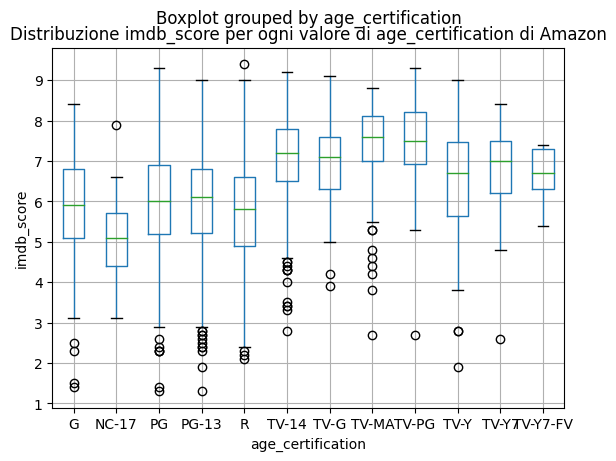

In [9]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification
plt.figure(figsize=(50,40))
amazon_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Amazon')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')


Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

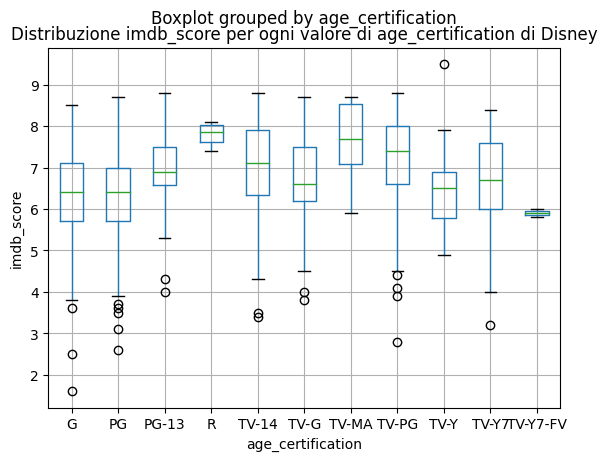

In [10]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification

plt.figure(figsize=(50,40))
disney_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Disney')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')

Text(0, 0.5, 'Numero di programmi')

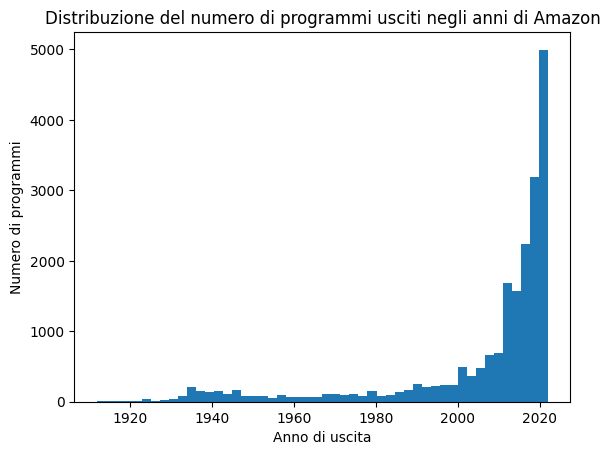

In [11]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(amazon_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

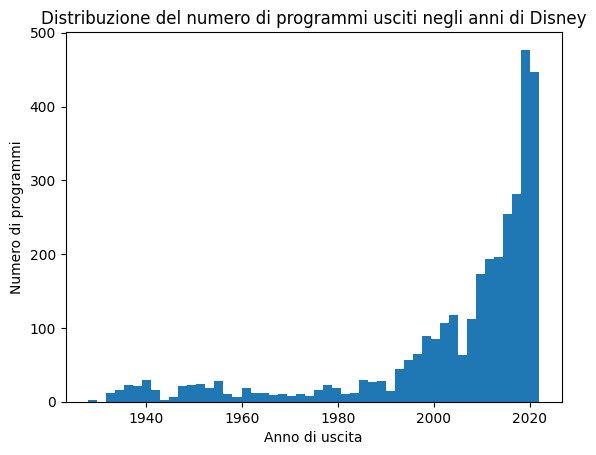

In [12]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(disney_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

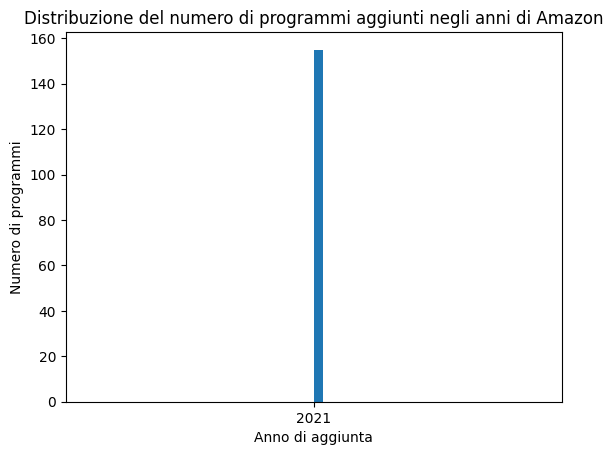

In [13]:
# TERZA

# Rappresento con un istogramma il numero di programmi aggiunti negli anni

plt.figure()
plt.hist(amazon_titles_combinata['year_added'][index_notn_amazon], bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

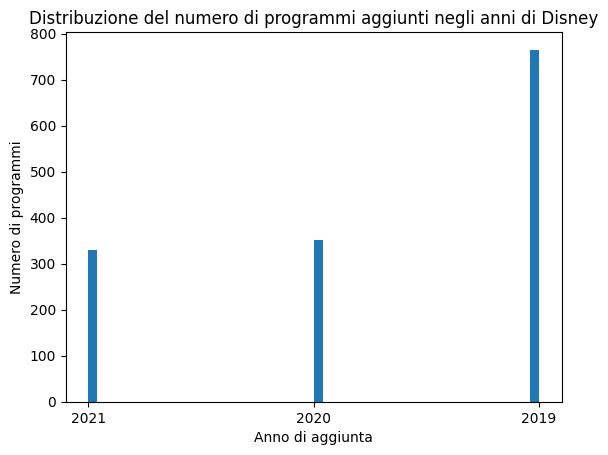

In [14]:
# TERZA

# Visualizzo un istogramma per rappresentare il numero di programmi aggiunti negli anni senza considerare le righe senza un valore

plt.figure()
plt.hist(disney_titles_combinata['year_added'][index_notn_disney], bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


----------------------------------------------------------------------------------------------------------------
TEST STATISTICI
----------------------------------------------------------------------------------------------------------------

In questo passaggio del progetto andremo ad effettuare degli studi sui dati per capire il comportamento di alcune colonne dei due dataset

Inizialmente controllerò la distribuzione dei MOVIE per anno di produzione rispetto a quelli di aggiunta

Poi eseguirò lo stesso procedimento sul tipo SHOW

Infine eseguirò il medesimo test sull'intera base di dati effettuando un join naturale tra i due dataset

In [24]:
# Controllata ogni distribuzione procedo ad effettuare il ttest per verificare se ci sono differenze significative tra le distribuzioni

# PRIMA

# Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita

# Prendiamo come ipotesi nulla che le due distribuzioni siano uguali

# Amazon

# Creo due array che contengono i valori di show per anno di aggiunta e per anno di uscita

# show_added_amazon = amazon_titles_combinata[index_show_amazon & index_notn_amazon]['year_added']

# show_released_amazon = amazon_titles_combinata[index_show_amazon]['release_year']

# Effettuo il ttest

# t, p_val = stats.ttest_ind(show_added_amazon.astype(int), show_released_amazon.astype(int))

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Amazon\n')

# print(t) 8.059402594826986
# print(p_val) 1.0397483322159648e-15

print('Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti\n')

# Disney

# Creo due array che contengono i valori di show per anno di aggiunta e per anno di uscita

show_added_disney = disney_titles_combinata[index_show_disney & index_notn_disney]['year_added']

show_released_disney = disney_titles_combinata[index_show_disney]['release_year']

# Effettuo il ttest

t, p_val = stats.ttest_ind(show_added_disney.astype(int), show_released_disney.astype(int))

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Disney\n')

print(t)
print(p_val)

print('Il p_value è molto basso, quindi possiamo rifiutare l\'ipotesi nulla e dire che le due distribuzioni sono diverse\n')

# Adesso per il tipo MOVIE

# Amazon

# Creo due array che contengono i valori di movie per anno di aggiunta e per anno di uscita

# movie_added_amazon = amazon_titles_combinata[index_movie_amazon & index_notn_amazon]['year_added']

# movie_released_amazon = amazon_titles_combinata[index_movie_amazon]['release_year']

# Effettuo il ttest

# t, p_val = stats.ttest_ind(movie_added_amazon.astype(int), movie_released_amazon.astype(int))

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Amazon\n')

# print(t) stampa 2.751563956148323
# print(p_val) stampa 0.005937382552533934

print('Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti\n')

# Disney

# Creo due array che contengono i valori di movie per anno di aggiunta e per anno di uscita

movie_added_disney = disney_titles_combinata[index_movie_disney & index_notn_disney]['year_added']

movie_released_disney = disney_titles_combinata[index_movie_disney]['release_year']

# Effettuo il ttest

t, p_val = stats.ttest_ind(movie_added_disney.astype(int), movie_released_disney.astype(int))

print('Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Disney\n')

print(t)
print(p_val)

print('Il p_value è molto basso, quindi possiamo rifiutare l\'ipotesi nulla e dire che le due distribuzioni sono diverse\n')

# Dato che ogni ttest sulla piattaforma amazon ha causato un errore (dato che i dati della colonna date_added erano troppo pochi),
# ho deciso di non effettuarlo sul join tra le due piattaforme anche se richiesto, visto che darebbe lo stesso errore







Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Amazon

Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di show per anno di aggiunta e per anno di uscita per Disney

12.967695707050808
2.721105413088606e-36
Il p_value è molto basso, quindi possiamo rifiutare l'ipotesi nulla e dire che le due distribuzioni sono diverse

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Amazon

Dati i troppi pochi dati a disposizione non ha senso considerare i valori restituiti

Effettuo il ttest per verificare se ci sono differenze significative tra le distribuzioni di movie per anno di aggiunta e per anno di uscita per Disney

25.492352674028492
2.4519703463505947e-131
Il p_value è molto b

----------------------------------------------------------------------------------------------------------------
OLAP
----------------------------------------------------------------------------------------------------------------

Questo passaggio richiede l'assemblaggio di una matrice tridimensionale avente come dimensioni:

Age_certification

Type

Country

Con cui dovremmo effettuare delle quantizzazioni, ovvero definiremo degli insiemi di appartenenza comuni per i valori correlati assunti delle colonne prese in considerazione

Quindi rispetto alla colonna age_certification ne definirò una nuova inserendo semplicemente le età in base alla classificazione corrispondente

La colonna type non necessita di quantizzazione

La colonna country invece necessita di una quantizzazione, quindi procedo con la creazione di una nuova colonna che contenga i continenti di appartenenza

In [ ]:
# Qua definisco la colonna age_certification_quant effettuando le conversioni in età per ogni valore di age_certification

# Per controllare le appartenenze creo liste con il nome dell'insieme a cui appartenere

# Creo liste con gli insiemi di età

All_years_age = ['G', 'TV-G', 'TV-Y']
Adults_age = ['R', 'TV-MA', 'NC-17']
Mature_age = ['TV-14']
Teens_age = ['PG-13']
Older_kids_age = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']

# Creo la funzione che controlli la fascia d'età corrispondente

def age_certification_quant(age_certification):
    if age_certification in All_years_age:
        return '0+'
    elif age_certification in Adults_age:
        return '18+'
    elif age_certification in Mature_age:
        return '16+'
    elif age_certification in Teens_age:
        return '13+'
    elif age_certification in Older_kids_age:
        return '7+'
    else:
        return 'NaN'

# liste con continenti per controllare le appartenenze dei valori di country con incluse sigle

Africa = ['DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'CI', 'KE', 'LS', 'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'YT', 'MA', 'MZ', 'NA', 'NE', 'NG', 'ST', 'RE', 'RW', 'SH', 'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG', 'EH', 'ZM', 'ZW']
Asia = ['AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CX', 'CC', 'IO', 'GE', 'HK', 'IN', 'ID', 'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KP', 'KR', 'KW', 'KG', 'LA', 'LB', 'MO', 'MY', 'MV', 'MN', 'MM', 'NP', 'OM', 'PK', 'PS', 'PH', 'QA', 'SA', 'SG', 'LK', 'SY', 'TW', 'TJ', 'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE']
Europe = ['AX', 'AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FO', 'FI', 'FR', 'DE', 'GI', 'GR', 'GG', 'VA', 'HU', 'IS', 'IE', 'IM', 'IT', 'JE', 'LV', 'LI', 'LT', 'LU', 'MK', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SJ', 'SE', 'CH', 'UA', 'GB', 'UK']
America = ['AI', 'AG', 'AR', 'AW', 'BS', 'BB', 'BZ', 'BM', 'BO', 'BQ', 'BV', 'BR', 'CA', 'KY', 'CL', 'CO', 'CR', 'CU', 'CW', 'DM', 'DO', 'EC', 'SV', 'FK', 'GF', 'GL', 'GD', 'GP', 'GT', 'GY', 'HT', 'HN', 'JM', 'MQ', 'MX', 'MS', 'NI', 'PA', 'PY', 'PE', 'PR', 'BL', 'KN', 'LC', 'MF', 'PM', 'VC', 'SX', 'GS', 'SR', 'TT', 'TC', 'US', 'UY', 'VE', 'VG', 'VI']
Oceania = ['AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU', 'NF', 'MP', 'PW', 'PG', 'PN', 'WS', 'SB', 'TK', 'TO', 'TV', 'UM', 'VU', 'WF']

# liste con continenti e stati scritti per esteso per controllare le appartenenze dei valori di country

Africa_full = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Réunion', 'Rwanda', 'Saint Helena, Ascension and Tristan da Cunha', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']
Asia_full = ['Afghanistan', '']
Europe_full =
America_full =
Oceania_full =

# Quindi definisco la funzione che controlli il continente di appartenenza della lista di valori di country, prima controlla le sigle poi, se non trova corrispondenze, controlla i nomi per esteso

# Mi sono reso conto che la colonna country contiene stringhe e non liste, quindi devo prima trasformare le stringhe in liste

def continent(country):
    country = country.replace("'" | "[" | "]", "")
    country = country.split(",")
    continents_counters = {'Africa': 0, 'Asia': 0, 'Europe': 0, 'America': 0, 'Oceania': 0}
    for x in country:
        if x in Africa:
            continents_counters['Africa'] += 1
            
        elif x in Asia:
            continents_counters['Asia'] += 1
            
        elif x in Europe:
            continents_counters['Europe'] += 1
            
        elif x in America:
            continents_counters['America'] += 1
            
        elif x in Oceania:
            continents_counters['Oceania'] += 1
            
        elif x in Africa_full:
            continents_counters['Africa'] += 1
            
        elif x in Asia_full:
            continents_counters['Asia'] += 1
            
        elif x in Europe_full:
            continents_counters['Europe'] += 1
            
        elif x in America_full:
            continents_counters['America'] += 1
            
        elif x in Oceania_full:
            continents_counters['Oceania'] += 1

    return maxcounter(continents_counters)
        
# Funzione che restituisce il continente con il valore più alto in un dizionario

def maxcounter(dizionario):
    max = 0
    for x in dizionario:
        if dizionario[x] > max:
            max = dizionario[x]
            max_key = x
    return max_key


# Amazon

#amazon_titles_combinata['age_certification_quant'] = amazon_titles_combinata['age_certification'].apply(lambda x: age_certification_quant(x))

# Disney

#disney_titles_combinata['age_certification_quant'] = disney_titles_combinata['age_certification'].apply(lambda x: age_certification_quant(x))

# Qua definisco la colonna country_quant contenente i continenti di appartenenza per ogni valore di country

# Amazon

#amazon_titles_combinata['country_quant'] = amazon_titles_combinata['country'].apply(lambda x: continent(x))

# Disney

#disney_titles_combinata['country_quant'] = disney_titles_combinata['country'].apply(lambda x: continent(x))





TypeError: unsupported operand type(s) for |: 'str' and 'str'